<a href="https://colab.research.google.com/github/ShauryaBhardwaj/Machine_learning_algorithms/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [75]:
class LinearRegressionModel:
  def __init__(self , x=None , y=None , number_of_datapoints = 100 , ideal_slope = 3 , ideal_bias = 5):

    self.x_data = None
    self.y_data = None

    if(x!=None):
        self.x_data = x
        self.y_data = y

    else:
        self.x_data , self.y_data = self.create_dataset(number_of_datapoints = 100 , ideal_slope = 3 , ideal_bias = 5)

    self.x_normalized , self.y_normalized , self.x_max , self.x_min , self.y_max , self.y_min = None , None , None , None , None , None
    self.w , self.b = None , None
    self.mse_list = []



  def create_dataset(self , number_of_datapoints = 100 , ideal_slope = 3 , ideal_bias = 5):

    x = np.arange(number_of_datapoints)
    y = (x * ideal_slope) + ideal_bias #eqn of the line is y = ideal_slope*x + ideal_biason
    coefficient_of_noise = 10
    noise = coefficient_of_noise * np.random.rand(1,number_of_datapoints)
    y = y + noise

    return (x , y)


  def normalize_dataset(self , x , y):

    x_norm = (x - np.min(x))/(np.max(x) - np.min(x))
    y_norm = (y - np.min(y))/(np.max(y) - np.min(y))

    x_norm = x_norm.reshape(100 , 1)
    y_norm = y_norm.reshape(100, 1)

    return x_norm , y_norm , np.max(x) , np.min(x) , np.max(y) , np.min(y)


  def initialise_parameters(self):
    w = np.random.rand()
    b = np.random.rand()

    return w , b


  def forward_pass(self , w , b , x):
    y_hat = (w*x) + b
    return y_hat


  def calculate_error(self , x , y , y_hat):
    mean_squared_error = np.sum((y - y_hat)**2)/(x.shape[0])
    dw = np.sum((x*(y - y_hat)))/(x.shape[0])
    db = np.sum(y - y_hat)/(x.shape[0])
    #print("mse is: " ,  mean_squared_error)

    return dw , db , mean_squared_error


  def update_parameters(self , w , b , dw , db , alpha=0.01):
    w = w + alpha*dw
    b = b + alpha*db

    return w , b


  def epoch(self , x , y , w , b):
    y_hat =  self.forward_pass(w , b , x)
    dw , db , mse = self.calculate_error(x , y , y_hat)
    self.mse_list.append(mse)
    w , b = self.update_parameters(w , b , dw , db)

    return w , b

  def rescale_w_b(self , w , b , x_max , x_min , y_max , y_min):
    rescaled_w = w*(y_max - y_min)/(x_max - x_min)
    rescaled_b = b*(y_max - y_min) - ((w*x_min*(y_max-y_min))/(x_max-x_min)) + y_min

    return rescaled_w , rescaled_b


  def fit(self , number_of_epochs = 100):
    w , b = self.initialise_parameters()
    self.x_normalized , self.y_normalized , self.x_max , self.x_min , self.y_max , self.y_min = self.normalize_dataset(self.x_data , self.y_data)

    for i in range(number_of_epochs):
      w , b = self.epoch(self.x_normalized , self.y_normalized , w , b)

    self.w , self.b = self.rescale_w_b(w , b , self.x_max , self.x_min , self.y_max , self.y_min)


  def plot_mse(self):
    plt.style.use('seaborn-darkgrid')

    y_axis = np.array(self.mse_list)
    y_axis.reshape(-1,1)
    x_axis = np.arange(y_axis.shape[0]) + 1

    plt.plot(x_axis , y_axis , label='MSE' , color='b' , linestyle = '-' , linewidth=2 )

    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.title('Mean Squared Error v/s Epoch')
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    #plt.savefig(checkpoint_path + '/mse.jpg')
    plt.show()


  def plot_best_fit_line(self):
    plt.style.use('seaborn-darkgrid')

    x_axis = np.arange(self.x_max) + 1
    y_axis = (self.w*x_axis) + self.b



    plt.plot(x_axis , y_axis , color='g' , linestyle = '-' , linewidth=2 )
    plt.scatter(self.x_data , self.y_data , c = 'b' , linewidth=0.5 , marker = '.')

    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.title('Best Fit Line')
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    #plt.savefig(checkpoint_path + '/graph.jpg')
    plt.show()


In [76]:
lrm = LinearRegressionModel()
lrm.fit(number_of_epochs = 5000)

In [77]:
print(lrm.w , lrm.b)

2.890685745892393 16.085527755270302


<ipython-input-75-7ceb503c5314>:96: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


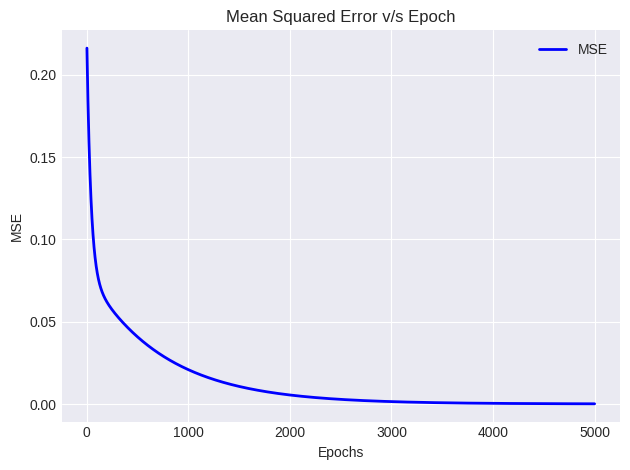

In [78]:
lrm.plot_mse()

<ipython-input-75-7ceb503c5314>:115: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


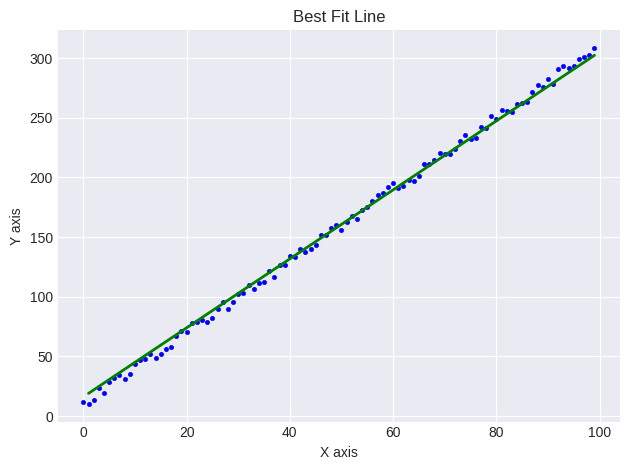

In [79]:
lrm.plot_best_fit_line()